In [54]:
# Importing the librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [55]:
# Load the dataset 
df = pd.read_csv('AirQualityUCI1.csv')

# Drop the trash columns
df = df.drop(columns=['Unnamed: 15','Unnamed: 16'])

# Show 5 random items
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
6220,11/24/2004,22:00:00,4.5,1354.0,-200.0,19.0,1269.0,773.0,506.0,141.0,1530.0,1580.0,8.6,82.3,0.9198
8262,2/18/2005,0:00:00,1.2,975.0,-200.0,3.3,670.0,129.0,943.0,105.0,910.0,616.0,6.9,48.7,0.4874
1485,5/11/2004,15:00:00,1.9,1131.0,-200.0,12.2,1058.0,121.0,824.0,91.0,1664.0,931.0,26.5,27.2,0.9282
989,4/20/2004,23:00:00,-200.0,1089.0,-200.0,9.0,940.0,-200.0,866.0,-200.0,1589.0,1001.0,14.2,59.1,0.9520
371,3/26/2004,5:00:00,0.8,952.0,52.0,3.0,654.0,72.0,1210.0,73.0,1312.0,832.0,7.7,72.4,0.7655


In [56]:
# Printing the dataset info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
None
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357

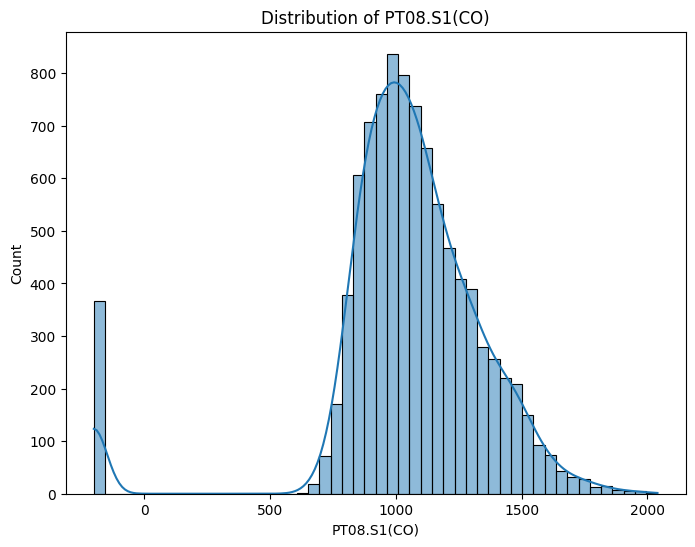

In [57]:
# plot 1: distribution of the target variable "PT08.S1(CO)"
plt.figure(figsize=(8, 6))
sns.histplot(df["PT08.S1(CO)"], bins=50, kde=True)
plt.title("Distribution of PT08.S1(CO)")
plt.xlabel("PT08.S1(CO)")
plt.show()

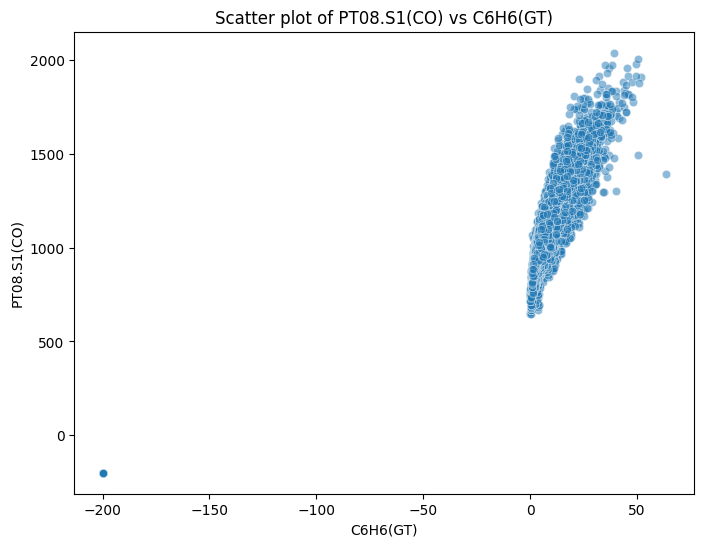

In [58]:
# plot 2: scatter plot of "PT08.S1(CO)" vs "C6H6(GT)"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="C6H6(GT)", y="PT08.S1(CO)", alpha=0.5)
plt.title("Scatter plot of PT08.S1(CO) vs C6H6(GT)")
plt.xlabel("C6H6(GT)")
plt.ylabel("PT08.S1(CO)")
plt.show()

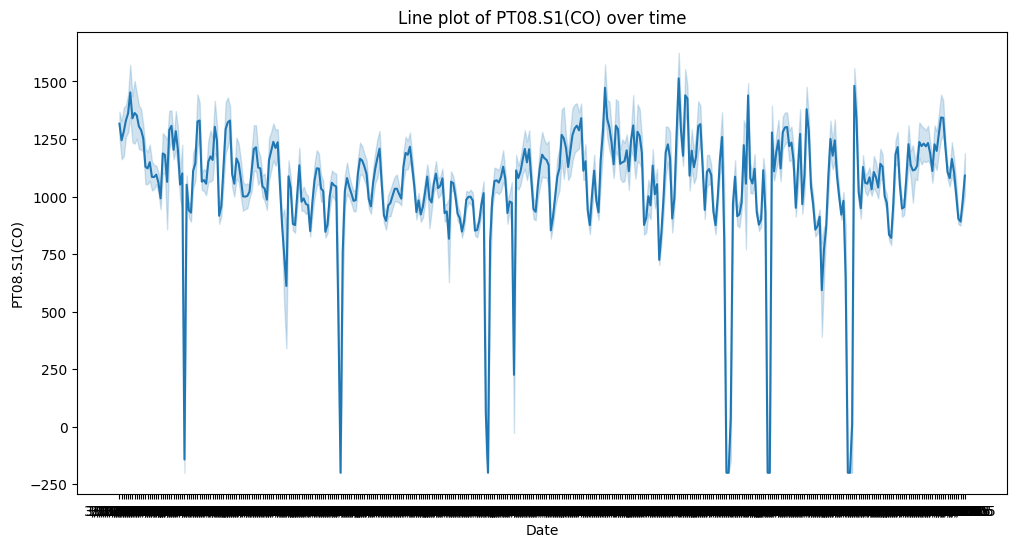

In [59]:
# plot 3: line plot of "PT08.S1(CO)" over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="PT08.S1(CO)")
plt.title("Line plot of PT08.S1(CO) over time")
plt.xlabel("Date")
plt.ylabel("PT08.S1(CO)")
plt.show()

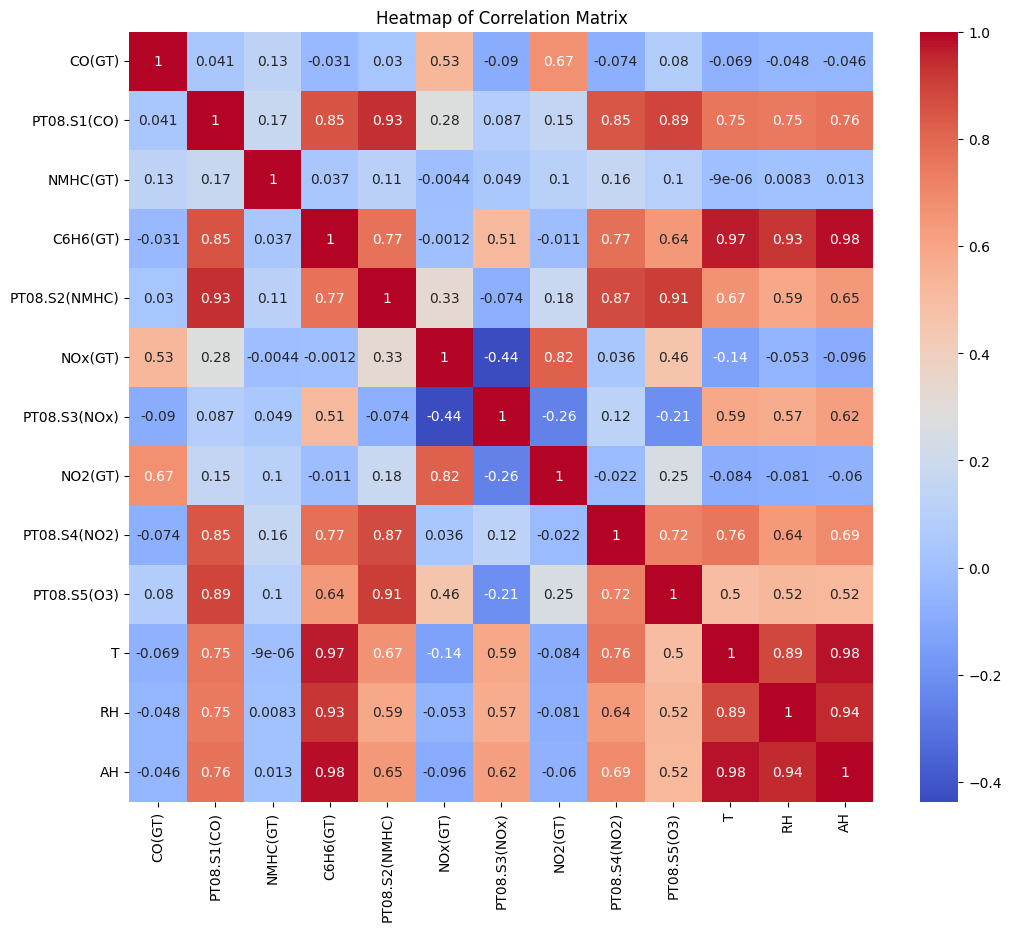

In [60]:
# plot 4: heatmap of correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation Matrix")
plt.show()

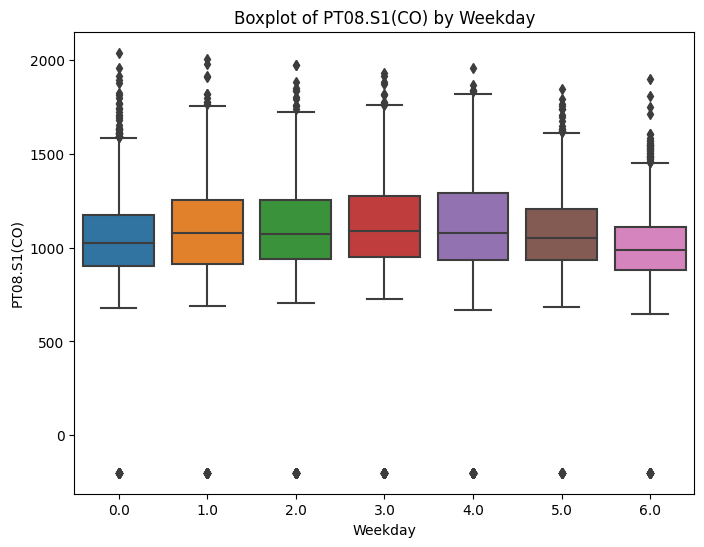

In [61]:
# Convert the "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# plot 5: boxplot of "PT08.S1(CO)" by "Weekday"
plt.figure(figsize=(8, 6))
df["Weekday"] = df["Date"].dt.weekday
sns.boxplot(data=df, x="Weekday", y="PT08.S1(CO)")
plt.title("Boxplot of PT08.S1(CO) by Weekday")
plt.xlabel("Weekday")
plt.ylabel("PT08.S1(CO)")
plt.show()

In [62]:
# Dataset Cleaning

# Replace the -200 values with NaNs
df.replace(-200, np.nan, inplace=True)

# Show the df shape before cleaning
print(df.isnull().sum())

# Drop 'NMHC(GT)' column for loss too much data
df = df.drop(columns=['NMHC(GT)'])

# Drop missing values
df.dropna(inplace=True)

# Show the df shape after cleaning
print(df.isnull().sum())
df.columns
df.shape

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Weekday           114
dtype: int64
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Weekday          0
dtype: int64


(6941, 15)

In [63]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2.0
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2.0
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2.0
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2.0
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2.0


In [64]:
# Feature Engineering

# Create new features
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour
df["Weekday"] = df["Date"].dt.weekday

# Convert the datetime column to a numeric format
df['Date'] = pd.to_numeric(df['Date'])
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Normalize the data
df = (df - df.mean()) / df.std()

<ipython-input-64-bcf1a3f5031b>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = (df - df.mean()) / df.std()


In [76]:
df.head(5)

,AH,C6H6(GT),CO(GT),Date,Hour,NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T,Time,Weekday
0,-0.567875,0.180237,0.289721,-1.705774,0.877590,-0.018411,-0.405884,1.097621,0.331207,0.949223,0.677470,0.517191,0.001038,-0.469798,NaN,-0.515706
1,-0.648404,-0.154649,-0.126611,-1.705774,1.024348,-0.460749,-0.707881,0.786741,-0.013418,1.417668,0.301021,-0.210958,-0.067796,-0.503716,NaN,-0.515706
2,-0.586823,-0.208231,0.012166,-1.705774,1.171106,0.002652,-0.573660,1.289635,-0.074011,1.282692,0.289699,0.039958,0.293583,-0.661999,NaN,-0.515706
3,-0.495823,-0.181440,0.012166,-1.705774,1.317865,0.171162,-0.377122,1.170769,-0.039927,1.092138,0.371782,0.357294,0.637754,-0.763753,NaN,-0.515706
4,-0.490587,-0.543117,-0.404166,-1.705774,1.464623,0.044780,-0.573660,0.695305,-0.464081,1.540734,0.105720,0.128517,0.614810,-0.741141,NaN,-0.515706


In [81]:
# Data Preparation
# Separate the target variable
X = df.drop(["PT08.S1(CO)", "Date", "Time"], axis=1)
y = df["PT08.S1(CO)"]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# print the shap of the sets
print(f'dataset: {df.shape}')
print('---------------------')
print(f'x_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print('---------------------')
print(f'x_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print('---------------------')
print(f'x_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')

dataset: (6941, 16)
---------------------
x_train: (4441, 13)
y_train: (4441,)
---------------------
x_test: (1389, 13)
y_test: (1389,)
---------------------
x_val: (1111, 13)
y_val: (1111,)


In [95]:
# Define a list of hyperparameters to search over for each model
ridge_params = {'alpha': [0.1, 1, 10]}
lasso_params = {'alpha': [0.1, 1, 10]}
elastic_params = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}

# Create Ridge, Lasso, and Elastic Net regression models
ridge_model = Ridge()
lasso_model = Lasso()
elastic_model = ElasticNet()

# Perform a grid search to find the best hyperparameters for each model
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

elastic_grid = GridSearchCV(elastic_model, elastic_params, cv=5)
elastic_grid.fit(X_train, y_train)

# Evaluate the performance of each model on the validation set
ridge_pred = ridge_grid.predict(X_val)
ridge_mse = mean_squared_error(y_val, ridge_pred)
print("-Ridge Regression Test MSE:", ridge_mse)

lasso_pred = lasso_grid.predict(X_val)
lasso_mse = mean_squared_error(y_val, lasso_pred)
print("-Lasso Regression Test MSE:", lasso_mse)

elastic_pred = elastic_grid.predict(X_val)
elastic_mse = mean_squared_error(y_val, elastic_pred)
print("-Elastic Net Regression Test MSE:", elastic_mse)

print("----------------------------------------------------")

# Print the best hyperparameters for each model
print("Ridge Regression Best Hyperparameters:", ridge_grid.best_params_)
print("Lasso Regression Best Hyperparameters:", lasso_grid.best_params_)
print("Elastic Net Regression Best Hyperparameters:", elastic_grid.best_params_)

-Ridge Regression Test MSE: 0.11279462008310284
-Lasso Regression Test MSE: 0.14741979693001273
-Elastic Net Regression Test MSE: 0.12339697127275749
----------------------------------------------------
Ridge Regression Best Hyperparameters: {'alpha': 1}
Lasso Regression Best Hyperparameters: {'alpha': 0.1}
Elastic Net Regression Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}


In [97]:
# Create Ridge, Lasso, and Elastic Net regression models with the best hyperparameters
ridge_model = Ridge(alpha=1)
lasso_model = Lasso(alpha=0.1)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit the models to the training data
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)

# Make predictions on the test data
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elastic_pred = elastic_model.predict(X_test)

# Calculate the MSE and R2 for each model on the test data
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_r2 = r2_score(y_test, elastic_pred)

# Print the MSE and R2 for each model
print("Ridge Regression Test MSE:", ridge_mse)
print("Ridge Regression Test R2:", ridge_r2)

print("--------------------------------------------")

print("Lasso Regression Test MSE:", lasso_mse)
print("Lasso Regression Test R2:", lasso_r2)

print("--------------------------------------------")

print("Elastic Net Regression Test MSE:", elastic_mse)
print("Elastic Net Regression Test R2:", elastic_r2)

Ridge Regression Test MSE: 0.1111162963713469
Ridge Regression Test R2: 0.8830820892870175
--------------------------------------------
Lasso Regression Test MSE: 0.1420401814491007
Lasso Regression Test R2: 0.8505436034618934
--------------------------------------------
Elastic Net Regression Test MSE: 0.12076621225008441
Elastic Net Regression Test R2: 0.872928331108042


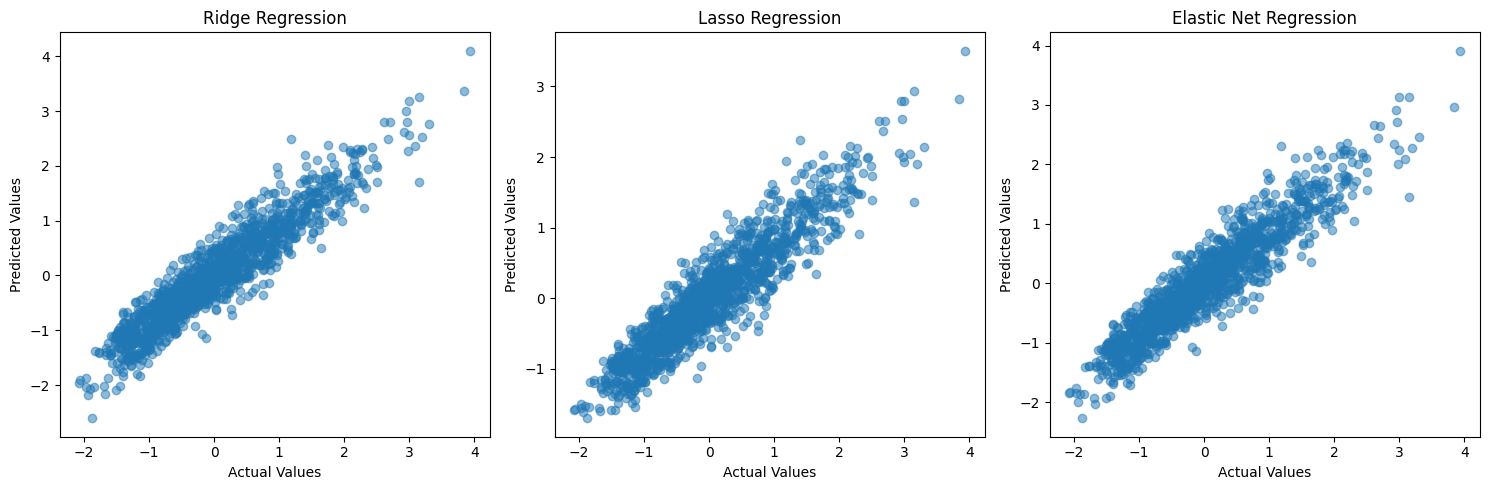

In [98]:
# Plot predicted values vs actual values for each model
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(y_test, ridge_pred, alpha=0.5)
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Ridge Regression')

axs[1].scatter(y_test, lasso_pred, alpha=0.5)
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Lasso Regression')

axs[2].scatter(y_test, elastic_pred, alpha=0.5)
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')
axs[2].set_title('Elastic Net Regression')

plt.tight_layout()
plt.show()